# ✈️ Proyecto de Predicción del Precio de Vuelos

### **Resumen del Proyecto**

Este proyecto de Data Science tiene como objetivo desarrollar un modelo predictivo capaz de estimar el precio de un boleto de avión. Utilizando un conjunto de datos del mundo real, se aplican técnicas de **análisis exploratorio de datos (EDA)** y **Machine Learning** para identificar los factores clave que influyen en el costo de los vuelos y construir un modelo robusto que ofrezca estimaciones precisas.

---

### **Objetivos y Metodología**

El análisis se ha estructurado en varias etapas para asegurar un enfoque riguroso y completo:

1.  **Exploración y Preprocesamiento de Datos:** Se realiza un análisis exploratorio detallado para comprender la distribución de las variables y la relación entre ellas. Se aplican técnicas de limpieza, como el manejo de valores nulos y atípicos, y se transforman los datos para prepararlos para el modelado.

2.  **Modelado Predictivo:** Se construyen y entrenan múltiples modelos de regresión, incluyendo `Random Forest`, `Regresión Lineal`, `Ridge`, `Lasso` y `Árbol de Decisión`.

3.  **Evaluación y Selección del Modelo:** Se evalúa el rendimiento de cada modelo utilizando métricas clave como el `R²` y el `Mean Squared Error (MSE)`. Se seleccionó el modelo con el mejor desempeño para la predicción final.

Este proyecto demuestra un dominio completo del flujo de trabajo de Machine Learning, desde la comprensión del problema de negocio hasta la evaluación de modelos para generar soluciones valiosas.

## 1. Exploración y Preprocesamiento de Datos
En esta sección, se realiza la importación de librerías y la carga inicial de los datos para comenzar con el análisis exploratorio y las tareas de limpieza.



### 1.1 Carga de Datos y Librerías 

En esta sección, importaremos todas las librerías necesarias para el análisis. La correcta organización de las importaciones es una buena práctica que facilita la lectura y el mantenimiento del código. Hemos agrupado las librerías por su función principal.

In [ ]:
# Librerías para manipulación y análisis de datos
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Librerías para machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error,mean_squared_error

# Herramientas de utilidad
import joblib
import warnings

import re

warnings.filterwarnings('ignore')

In [ ]:
# Carga de los datasets
df_business = pd.read_excel('C:/Users/JOGO/Documents/ANALISIS DE DATOS/DESAFIO LATAM/MACHINE LEARNING/Prediccion precios de vuelos/business.xlsx')
df_economy = pd.read_excel('C:/Users/JOGO/Documents/ANALISIS DE DATOS/DESAFIO LATAM/MACHINE LEARNING/Prediccion precios de vuelos/economy.xlsx')




In [ ]:
# Inspección inicial de los dataframes
print("Información de df_business:")

df_business.head()

Información de df_business:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690


In [ ]:
# Inspección inicial de los dataframes
print("Información de df_business:")

df_economy.head()

Información de df_business:


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,2022-02-11,SpiceJet,SG,8709,18:55:00,Delhi,02h 10m,non-stop,21:05:00,Mumbai,5953
1,2022-02-11,SpiceJet,SG,8157,06:20:00,Delhi,02h 20m,non-stop,08:40:00,Mumbai,5953
2,2022-02-11,AirAsia,I5,764,04:25:00,Delhi,02h 10m,non-stop,06:35:00,Mumbai,5956
3,2022-02-11,Vistara,UK,995,10:20:00,Delhi,02h 15m,non-stop,12:35:00,Mumbai,5955
4,2022-02-11,Vistara,UK,963,08:50:00,Delhi,02h 20m,non-stop,11:10:00,Mumbai,5955


In [ ]:
#Combinar ambos dataframe

# Se crea una nueva columna llamada 'clase' con el valor 'business'
df_business['clase']='business'

# Se crea la misma columna 'clase' con el valor 'economy'
df_economy['clase']='economy'

# Se combinan ambos dataframes verticalmente (axis=0)y se nombra df_precio_vuelos para mayor claridad
df_precio_vuelos=pd.concat([df_business,df_economy],axis=0)

### 1.2. Fusión y Limpieza Inicial

In [ ]:
# Verificamos la forma del nuevo dataframe combinado
print(f"La forma del dataframe combinado es: {df_precio_vuelos.shape}")

# Mostramos los primeros 5 registros para confirmar la nueva columna 'clase'

df_precio_vuelos.head()

La forma del dataframe combinado es: (300261, 12)


,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business


In [ ]:
# Revisamos los tipos de datos de las columnas. 

df_precio_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300261 entries, 0 to 206773
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        300261 non-null  datetime64[ns]
 1   airline     300261 non-null  object        
 2   ch_code     300261 non-null  object        
 3   num_code    300261 non-null  int64         
 4   dep_time    300261 non-null  object        
 5   from        300261 non-null  object        
 6   time_taken  300261 non-null  object        
 7   stop        300261 non-null  object        
 8   arr_time    300261 non-null  object        
 9   to          300261 non-null  object        
 10  price       300261 non-null  object        
 11  clase       300261 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 29.8+ MB


Existen columnas que son de tipo object que debemos transformar a tipo númerico para hacer calculos con algunas columnas

In [ ]:
#Busqueda de datos nulos
df_precio_vuelos.isnull().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
clase         0
dtype: int64

No existen datos nulos

In [ ]:
#Buscar datos duplicados
df_precio_vuelos.duplicated().sum()

2

In [ ]:
#Eliminar datos duplicados
df_precio_vuelos.drop_duplicates(inplace=True)

In [ ]:
# Se revisa que los valores nulos hayan seido elimados

df_precio_vuelos.duplicated().sum()

0

Los datos dupolicados se han eliminado

### 1.3. Ingeniería de Características (Feature Engineering)
Se crean o modifican variables para mejorar el rendimiento del modelo. Aquí se incluiría la limpieza y transformación de las columnas de tiempo (time_taken, dep_time, arr_time) y la codificación de variables categóricas.


Empecemos analizando las columna y sus valores únicos para ver sus categorías.

In [ ]:
# Contar los valores únicos en todas las columnas de tipo 'object'
for column in df_precio_vuelos.select_dtypes(include='object').columns:
    print(f"Columna: {column}")
    print(df_precio_vuelos[column].unique())
    print("-" * 30)

Columna: airline
['Air India' 'Vistara' 'SpiceJet' 'AirAsia' 'GO FIRST' 'Indigo' 'Trujet'
 'StarAir']
------------------------------
Columna: ch_code
['AI' 'UK' 'SG' 'I5' 'G8' '6E' '2T' 'S5']
------------------------------
Columna: dep_time
[datetime.time(18, 0) datetime.time(19, 0) datetime.time(20, 0)
 datetime.time(21, 25) datetime.time(17, 15) datetime.time(19, 50)
 datetime.time(21, 15) datetime.time(18, 40) datetime.time(20, 35)
 datetime.time(21, 35) datetime.time(17, 20) datetime.time(20, 40)
 datetime.time(16, 15) datetime.time(16, 5) datetime.time(20, 15)
 datetime.time(16, 55) datetime.time(17, 30) datetime.time(17, 35)
 datetime.time(17, 25) datetime.time(7, 0) datetime.time(8, 0)
 datetime.time(9, 0) datetime.time(14, 30) datetime.time(17, 50)
 datetime.time(5, 55) datetime.time(13, 40) datetime.time(12, 55)
 datetime.time(8, 50) datetime.time(17, 45) datetime.time(7, 5)
 datetime.time(18, 30) datetime.time(4, 55) datetime.time(17, 10)
 datetime.time(9, 30) datetime.time(1

In [ ]:
#Revisamos el dataframe

df_precio_vuelos.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,clase
0,2022-02-11,Air India,AI,868,18:00:00,Delhi,02h 00m,non-stop,20:00:00,Mumbai,25612,business
1,2022-02-11,Air India,AI,624,19:00:00,Delhi,02h 15m,non-stop,21:15:00,Mumbai,25612,business
2,2022-02-11,Air India,AI,531,20:00:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45:00,Mumbai,42220,business
3,2022-02-11,Air India,AI,839,21:25:00,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,44450,business
4,2022-02-11,Air India,AI,544,17:15:00,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55:00,Mumbai,46690,business


In [ ]:
# Inspeccionar valores unicos de la columna 'stop'
print("Valores únicos de la columna 'stop' antes del cambio:")
print(df_precio_vuelos['stop'].unique())

Valores únicos de la columna 'stop' antes del cambio:
['non-stop' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAY\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Guwahati\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GAU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia NDC\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXE\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\

In [ ]:
# Eliminar el texto innecesario y los caracteres especiales
df_precio_vuelos['stop'] = df_precio_vuelos['stop'].str.split('Via').str[0]
df_precio_vuelos['stop'] = df_precio_vuelos['stop'].str.strip()
print("Valores únicos de 'stop' después de la limpieza inicial:")
print(df_precio_vuelos['stop'].unique())

Valores únicos de 'stop' después de la limpieza inicial:
['non-stop' '1-stop' '2+-stop']


Convertir a Valores Numéricos.
Una vez que la columna esté limpia, podemos mapear los valores de texto a números.

In [ ]:
# Mapear los valores de texto a números
df_precio_vuelos['stop'] = df_precio_vuelos['stop'].map({'non-stop': 0, '1-stop': 1, '2+-stop': 2})

# Verificamos que la conversión se haya realizado correctamente
print("\nConteo de valores de 'stop' después de la conversión:")
print(df_precio_vuelos['stop'].value_counts())
print("\nTipos de datos después de la conversión:")
print(df_precio_vuelos['stop'].dtype)


Conteo de valores de 'stop' después de la conversión:
stop
1    250927
0     36044
2     13288
Name: count, dtype: int64

Tipos de datos después de la conversión:
int64


In [ ]:
# Revisamos los 20 primeros valores
print(df_precio_vuelos['price'].head(20))


0     25612
1     25612
2     42220
3     44450
4     46690
5     50264
6     50669
7     51059
8     51731
9     53288
10    56081
11    56081
12    57074
13    57074
14    57074
15    57074
16    57868
17    57868
18    57868
19    59996
Name: price, dtype: object


In [ ]:
# Asegurarse que todos los valores sean strings
df_precio_vuelos['price'] = df_precio_vuelos['price'].astype(str)

# Limpiar comas, espacios y otros caracteres no numéricos
df_precio_vuelos['price'] = df_precio_vuelos['price'].str.replace(',', '').str.strip()

# Convertir a float
df_precio_vuelos['price'] = df_precio_vuelos['price'].astype(float)

In [ ]:
# Revisamos si existen valores nulos

df_precio_vuelos.isnull ().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
clase         0
dtype: int64

Consolidación de Variables Redundantes (airline y ch_code)
En este paso, examinaremos las columnas airline y ch_code. Como ambas se refieren a la misma información, la aerolínea, elegiremos la columna más legible para nuestro análisis y eliminaremos la otra para evitar la redundancia.

In [ ]:
# Inspeccionar valores únicos de ambas columnas para confirmar que se refieren a lo mismo
print("Valores únicos de la columna 'airline':")
print(df_precio_vuelos['airline'].unique())
print("\nValores únicos de la columna 'ch_code':")
print(df_precio_vuelos['ch_code'].unique())

# Eliminamos la columna 'ch_code' por ser redundante
df_precio_vuelos.drop('ch_code', axis=1, inplace=True)

# Verificamos que la columna 'ch_code' haya sido eliminada
print("\nColumnas del DataFrame después de la eliminación:")
print(df_precio_vuelos.columns)

Valores únicos de la columna 'airline':
['Air India' 'Vistara' 'SpiceJet' 'AirAsia' 'GO FIRST' 'Indigo' 'Trujet'
 'StarAir']

Valores únicos de la columna 'ch_code':
['AI' 'UK' 'SG' 'I5' 'G8' '6E' '2T' 'S5']

Columnas del DataFrame después de la eliminación:
Index(['date', 'airline', 'num_code', 'dep_time', 'from', 'time_taken', 'stop',
       'arr_time', 'to', 'price', 'clase'],
      dtype='object')


In [ ]:
# Convertir 'airline' a variables binarias
df_precio_vuelos = pd.get_dummies(df_precio_vuelos, columns=['airline'], drop_first=True)

# Verificar que se crearon las columnas dummies
print(df_precio_vuelos.filter(like='airline_').columns)



Index(['airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara'],
      dtype='object')


Limpieza de las Columnas de Hora

Las variables `dep_time` (hora de salida) y `arr_time` (hora de llegada) se encuentran en un formato de objeto de tiempo que no es compatible con los modelos predictivos. Para resolver esto, las convertiremos a un formato numérico que represente los minutos transcurridos desde la medianoche.

In [ ]:
# Convertir dep_time y arr_time a minutos
df_precio_vuelos['dep_time_min'] = df_precio_vuelos['dep_time'].apply(
    lambda x: x.hour * 60 + x.minute
)
df_precio_vuelos['arr_time_min'] = df_precio_vuelos['arr_time'].apply(
    lambda x: x.hour * 60 + x.minute
)

# Eliminar las columnas originales
df_precio_vuelos.drop(['dep_time', 'arr_time'], axis=1, inplace=True)

# Verificar que las nuevas columnas han sido creadas
print("Columnas del DataFrame después de la transformación de hora:")
print(df_precio_vuelos.columns)

# Inspeccionar los primeros registros para ver las nuevas columnas
df_precio_vuelos[['dep_time_min', 'arr_time_min']].head()

Columnas del DataFrame después de la transformación de hora:
Index(['date', 'num_code', 'from', 'time_taken', 'stop', 'to', 'price',
       'clase', 'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'dep_time_min', 'arr_time_min'],
      dtype='object')


,dep_time_min,arr_time_min
0,1080,1200
1,1140,1275
2,1200,1245
3,1285,1435
4,1035,1435


Codificación de Variables de Ubicación (from y to)
El One-Hot Encoding creará una nueva columna binaria (0 o 1) para cada ciudad. Por ejemplo, la columna from se convertirá en from_Delhi, from_Mumbai, etc. Esto le permite al modelo entender las categorías sin asumir una relación de orden entre ellas.

In [ ]:
# Inspeccionar valores únicos de las columnas para verificar las categorías
print("Valores únicos de la columna 'from':")
print(df_precio_vuelos['from'].unique())
print("\nValores únicos de la columna 'to':")
print(df_precio_vuelos['to'].unique())

# Aplicar One-Hot Encoding a las columnas 'from' y 'to'
df_precio_vuelos = pd.get_dummies(df_precio_vuelos, columns=['from', 'to'], dtype=int)

# Verificamos las nuevas columnas creadas
print("\nNuevas columnas después de la codificación:")
print(df_precio_vuelos.columns)

# Inspeccionamos las primeras filas para ver el resultado
df_precio_vuelos.head()

Valores únicos de la columna 'from':
['Delhi' 'Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai']

Valores únicos de la columna 'to':
['Mumbai' 'Bangalore' 'Kolkata' 'Hyderabad' 'Chennai' 'Delhi']

Nuevas columnas después de la codificación:
Index(['date', 'num_code', 'time_taken', 'stop', 'price', 'clase',
       'airline_AirAsia', 'airline_GO FIRST', 'airline_Indigo',
       'airline_SpiceJet', 'airline_StarAir', 'airline_Trujet',
       'airline_Vistara', 'dep_time_min', 'arr_time_min', 'from_Bangalore',
       'from_Chennai', 'from_Delhi', 'from_Hyderabad', 'from_Kolkata',
       'from_Mumbai', 'to_Bangalore', 'to_Chennai', 'to_Delhi', 'to_Hyderabad',
       'to_Kolkata', 'to_Mumbai'],
      dtype='object')


,date,num_code,time_taken,stop,price,clase,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,...,from_Delhi,from_Hyderabad,from_Kolkata,from_Mumbai,to_Bangalore,to_Chennai,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai
0,2022-02-11,868,02h 00m,0,25612.0,business,False,False,False,False,...,1,0,0,0,0,0,0,0,0,1
1,2022-02-11,624,02h 15m,0,25612.0,business,False,False,False,False,...,1,0,0,0,0,0,0,0,0,1
2,2022-02-11,531,24h 45m,1,42220.0,business,False,False,False,False,...,1,0,0,0,0,0,0,0,0,1
3,2022-02-11,839,26h 30m,1,44450.0,business,False,False,False,False,...,1,0,0,0,0,0,0,0,0,1
4,2022-02-11,544,06h 40m,1,46690.0,business,False,False,False,False,...,1,0,0,0,0,0,0,0,0,1


Limpieza y Transformación de la Duración del Vuelo (time_taken)
El primer paso, como en la columna stop, es inspeccionar los valores únicos de esta variable para entender la variedad de formatos y los posibles errores que pueda contener.

In [ ]:
# Inspeccionar valores únicos en la columna 'time_taken'
print("Valores únicos de 'time_taken':")
print(df_precio_vuelos['time_taken'].unique())

# Ver la cantidad de cada valor único
print("\nConteo de cada valor de 'time_taken':")
print(df_precio_vuelos['time_taken'].value_counts())

Valores únicos de 'time_taken':
['02h 00m' '02h 15m' '24h 45m' '26h 30m' '06h 40m' '02h 10m' '17h 45m'
 '22h 45m' '17h 55m' '11h 00m' '15h 15m' '11h 25m' '15h 50m' '21h 35m'
 '26h 00m' '05h 45m' '16h 10m' '28h 10m' '19h 20m' '23h 50m' '27h 10m'
 '06h 00m' '19h 30m' '26h 50m' '12h 25m' '14h 40m' '24h 25m' '26h 40m'
 '28h 15m' '15h 35m' '17h 50m' '18h 15m' '02h 05m' '03h 30m' '03h 45m'
 '17h 30m' '25h 35m' '06h 20m' '02h 20m' '08h 00m' '20h 35m' '10h 05m'
 '04h 25m' '23h 55m' '14h 10m' '15h 45m' '04h 50m' '07h 00m' '20h 50m'
 '23h 45m' '26h 25m' '13h 15m' '21h 25m' '06h 25m' '05h 00m' '30h 05m'
 '05h 20m' '08h 15m' '12h 35m' '15h 30m' '23h 30m' '27h 45m' '08h 25m'
 '12h 10m' '20h 25m' '24h 50m' '09h 05m' '15h 25m' '07h 35m' '11h 10m'
 '12h 45m' '13h 45m' '18h 00m' '07h 55m' '06h 15m' '08h 55m' '24h 55m'
 '29h 40m' '21h 05m' '27h 35m' '28h 25m' '24h 35m' '26h 10m' '16h 30m'
 '25h 55m' '19h 05m' '22h 50m' '11h 20m' '14h 55m' '07h 15m' '20h 05m'
 '23h 10m' '24h 10m' '30h 00m' '06h 30m' '13h

 Limpieza y Transformación de la Duración del Vuelo (time_taken)
El siguiente código te ayudará a transformar la columna time_taken a una variable numérica que represente los minutos totales.

In [ ]:
def tiempo_a_minutos(tiempo):
    """
    Convierte una cadena de texto de duración de vuelo a minutos totales.
    Ejemplo: '2h 15m' -> 135
    """
    tiempo = str(tiempo).replace('h', '*60').replace(' ', '+').replace('m', '*1')
    try:
        return eval(tiempo)
    except:
        return 0

# Aplicar la función a la columna 'time_taken'
df_precio_vuelos['time_taken_min'] = df_precio_vuelos['time_taken'].apply(tiempo_a_minutos)

In [ ]:


def convertir_a_minutos_v2(tiempo):
    """
    Convierte una cadena de duración de vuelo a minutos totales usando regex.
    Ejemplo: '2h 15m' -> 135 minutos
    """
    # Expresión regular para encontrar los números de horas y minutos
    # Busca uno o más dígitos (\d+) seguidos de 'h' (horas) o 'm' (minutos)
    match = re.findall(r'(\d+)h?\s*(\d*)m?', tiempo)
    
    horas = 0
    minutos = 0

    if len(match) > 0:
        if match[0][0]:
            horas = int(match[0][0])
        if match[0][1]:
            minutos = int(match[0][1])
            
    return horas * 60 + minutos

# Aplicar la nueva función a la columna 'time_taken'
df_precio_vuelos['time_taken_min'] = df_precio_vuelos['time_taken'].apply(convertir_a_minutos_v2)

# Eliminar la columna 'time_taken' original
df_precio_vuelos.drop('time_taken', axis=1, inplace=True)

# Verificar los primeros registros para ver la nueva columna
print("Primeros 5 registros de la nueva columna 'time_taken_min':")
print(df_precio_vuelos['time_taken_min'].head())

Primeros 5 registros de la nueva columna 'time_taken_min':
0     120
1     135
2    1485
3    1590
4     400
Name: time_taken_min, dtype: int64


In [ ]:
# Mapear los valores de texto a números
df_precio_vuelos['clase'] = df_precio_vuelos['clase'].map(
    {'business': 0, 'economy': 1}
)

# Verificar la conversión
print("Conteo de valores de la columna 'clase' después de la conversión:")
print(df_precio_vuelos['clase'].value_counts())

Conteo de valores de la columna 'clase' después de la conversión:
clase
1    206772
0     93487
Name: count, dtype: int64


Transformación de la variable temporal `date`

La columna `date` contenía información en formato `datetime` (`Timestamp`), lo que impedía que los modelos de *scikit-learn* pudieran procesarla directamente.  
Sin embargo, esta variable es clave para el análisis, ya que permite capturar patrones temporales que influyen en el precio de los vuelos (como temporada alta, días de la semana, fines de semana, etc.).

Para conservar la información relevante de la fecha, se descompuso en variables numéricas que representan sus componentes principales:

- **`anio`**: Año del vuelo.
- **`mes`**: Mes del vuelo (permite detectar estacionalidad).
- **`dia`**: Día del mes del vuelo.
- **`dia_semana`**: Día de la semana (0 = lunes, 6 = domingo).
- **`es_fin_de_semana`**: Variable binaria que indica si el vuelo es en sábado o domingo.


In [33]:
# Asegurar que la columna está en formato datetime
df_precio_vuelos['date'] = pd.to_datetime(df_precio_vuelos['date'], errors='coerce')

# Extraer componentes de la fecha
df_precio_vuelos['anio'] = df_precio_vuelos['date'].dt.year
df_precio_vuelos['mes'] = df_precio_vuelos['date'].dt.month
df_precio_vuelos['dia'] = df_precio_vuelos['date'].dt.day
df_precio_vuelos['dia_semana'] = df_precio_vuelos['date'].dt.dayofweek  # Lunes=0, Domingo=6
df_precio_vuelos['es_fin_de_semana'] = df_precio_vuelos['dia_semana'].isin([5, 6]).astype(int)

# Eliminar columna original para el modelado
df_precio_vuelos = df_precio_vuelos.drop(columns=['date'])


Análisis Exploratorio de Variables Numéricas

Ahora que hemos transformado las variables categóricas, es crucial analizar las variables numéricas. En esta sección, buscaremos entender su distribución, identificar posibles valores atípicos (outliers) y verificar que no existan inconsistencias que puedan afectar el rendimiento del modelo.

Para empezar, utilizaremos el método `.describe()` para obtener un resumen estadístico de las variables.

In [34]:
df_precio_vuelos.describe()


,num_code,stop,price,clase,dep_time_min,arr_time_min,from_Bangalore,from_Chennai,from_Delhi,from_Hyderabad,...,to_Delhi,to_Hyderabad,to_Kolkata,to_Mumbai,time_taken_min,anio,mes,dia,dia_semana,es_fin_de_semana
count,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000,300259.00000,300259.000000,...,300259.000000,300259.000000,300259.000000,300259.000000,300259.000000,300259.0,300259.000000,300259.000000,300259.000000,300259.000000
mean,1417.776883,0.924212,20883.800386,0.688645,806.031476,943.823432,0.173537,0.128889,0.20430,0.136083,...,0.191038,0.142464,0.164974,0.196853,733.062340,2022.0,2.664996,17.384645,2.954656,0.280448
std,1974.519951,0.398189,22695.962230,0.463048,323.359577,363.093213,0.378711,0.335077,0.40319,0.342877,...,0.393120,0.349526,0.371158,0.397621,431.575427,0.0,0.471993,8.074025,2.003243,0.449219
min,101.000000,0.000000,1105.000000,0.000000,10.000000,5.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,50.000000,2022.0,2.000000,1.000000,0.000000,0.000000
25%,637.000000,1.000000,4783.000000,0.000000,510.000000,635.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,405.000000,2022.0,2.000000,12.000000,1.000000,0.000000
50%,818.000000,1.000000,7425.000000,1.000000,775.000000,1025.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,675.000000,2022.0,3.000000,18.000000,3.000000,0.000000
75%,927.000000,1.000000,42521.000000,1.000000,1110.000000,1245.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,970.000000,2022.0,3.000000,24.000000,5.000000,1.000000
max,9991.000000,2.000000,123071.000000,1.000000,1435.000000,1439.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,2990.000000,2022.0,3.000000,31.000000,6.000000,1.000000


In [35]:
# Muestra los registros donde 'num_code' es mayor a un umbral (por ejemplo, 1000)
print("Registros con valores atípicos en 'num_code':")
print(df_precio_vuelos[df_precio_vuelos['num_code'] > 1000])



Registros con valores atípicos en 'num_code':
        num_code  stop   price  clase  airline_AirAsia  airline_GO FIRST  \
0           8709     0  5953.0      1            False             False   
1           8157     0  5953.0      1            False             False   
12          5001     0  5955.0      1            False             False   
13          6202     0  5955.0      1            False             False   
15          6278     0  5955.0      1            False             False   
...          ...   ...     ...    ...              ...               ...   
206719      6006     0  1551.0      1            False             False   
206722      6215     0  1551.0      1            False             False   
206724      1229     1  1550.0      1             True             False   
206725      2462     1  1550.0      1             True             False   
206758      7193     1  5410.0      1            False             False   

        airline_Indigo  airline_SpiceJet 

In [36]:
# Muestra los registros donde 'num_code' es 9991
print("Registros con num_code = 9991:")
print(df_precio_vuelos[df_precio_vuelos['num_code'] == 9991])

# Eliminar la columna 'num_code'
df_precio_vuelos.drop('num_code', axis=1, inplace=True)

# Confirmar que la columna ha sido eliminada
print("\nColumnas del DataFrame después de la eliminación de 'num_code':")
print(df_precio_vuelos.columns)

Registros con num_code = 9991:
       num_code  stop    price  clase  airline_AirAsia  airline_GO FIRST  \
20398      9991     1  10535.0      1            False             False   

       airline_Indigo  airline_SpiceJet  airline_StarAir  airline_Trujet  ...  \
20398           False             False            False           False  ...   

       to_Delhi  to_Hyderabad  to_Kolkata  to_Mumbai  time_taken_min  anio  \
20398         0             0           1          0             515  2022   

       mes  dia  dia_semana  es_fin_de_semana  
20398    2   13           6                 1  

[1 rows x 31 columns]

Columnas del DataFrame después de la eliminación de 'num_code':
Index(['stop', 'price', 'clase', 'airline_AirAsia', 'airline_GO FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_StarAir',
       'airline_Trujet', 'airline_Vistara', 'dep_time_min', 'arr_time_min',
       'from_Bangalore', 'from_Chennai', 'from_Delhi', 'from_Hyderabad',
       'from_Kolkata', 'fro

In [37]:
# Muestra los registros donde 'time_taken_min' es mayor a un umbral (por ejemplo, 1800 minutos = 30 horas)
print("Registros con valores atípicos en 'time_taken_min':")
print(df_precio_vuelos[df_precio_vuelos['time_taken_min'] > 1800])

Registros con valores atípicos en 'time_taken_min':
        stop    price  clase  airline_AirAsia  airline_GO FIRST  \
76         1  53582.0      0            False             False   
167        1  51342.0      0            False             False   
253        1  44622.0      0            False             False   
419        1  61139.0      0            False             False   
481        1  44622.0      0            False             False   
...      ...      ...    ...              ...               ...   
205637     2   6015.0      1            False             False   
205638     2   6015.0      1            False             False   
205747     2   9691.0      1            False             False   
205810     2   6015.0      1            False             False   
206019     2   9271.0      1            False             False   

        airline_Indigo  airline_SpiceJet  airline_StarAir  airline_Trujet  \
76               False             False            False         

In [38]:
# Muestra los registros donde 'time_taken_min' es mayor a un umbral (por ejemplo, 1800 minutos = 30 horas)
print("Registros con valores atípicos en 'time_taken_min':")
print(df_precio_vuelos[df_precio_vuelos['time_taken_min'] > 1800].shape[0])

# Eliminar los registros con valores atípicos
df_precio_vuelos = df_precio_vuelos[df_precio_vuelos['time_taken_min'] <= 1800]

# Verificar la nueva forma del DataFrame
print(f"Número de registros después de la limpieza: {df_precio_vuelos.shape[0]}")

Registros con valores atípicos en 'time_taken_min':
2226
Número de registros después de la limpieza: 298033


## 2.  **Modelado Predictivo:** 

### 2.1. División de datos en entrenamiento y prueba

En esta etapa separamos el dataset en dos subconjuntos:

- **Entrenamiento (train):** utilizado para que el modelo aprenda los patrones y relaciones presentes en los datos.
- **Prueba (test):** utilizado para evaluar el rendimiento del modelo con datos que no ha visto antes, simulando su desempeño en un escenario real.

La separación se realizó utilizando `train_test_split` de la librería *scikit-learn*, asignando un **80%** de los datos para entrenamiento y un **20%** para prueba.  
Se incluyó un parámetro `random_state=42` para asegurar la **reproducibilidad** de los resultados.



In [39]:
#Código de implementación:

# Separar variables predictoras (X) y variable objetivo (y)
X = df_precio_vuelos.drop('price', axis=1)  # Reemplazar 'precio' con el nombre de la variable objetivo
y = df_precio_vuelos['price']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% para prueba
    random_state=42     # Semilla para reproducibilidad
)

print(f"Tamaño de entrenamiento: {X_train.shape[0]} registros")
print(f"Tamaño de prueba: {X_test.shape[0]} registros")


Tamaño de entrenamiento: 238426 registros
Tamaño de prueba: 59607 registros


In [40]:
df_precio_vuelos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298033 entries, 0 to 206773
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   stop              298033 non-null  int64  
 1   price             298033 non-null  float64
 2   clase             298033 non-null  int64  
 3   airline_AirAsia   298033 non-null  bool   
 4   airline_GO FIRST  298033 non-null  bool   
 5   airline_Indigo    298033 non-null  bool   
 6   airline_SpiceJet  298033 non-null  bool   
 7   airline_StarAir   298033 non-null  bool   
 8   airline_Trujet    298033 non-null  bool   
 9   airline_Vistara   298033 non-null  bool   
 10  dep_time_min      298033 non-null  int64  
 11  arr_time_min      298033 non-null  int64  
 12  from_Bangalore    298033 non-null  int32  
 13  from_Chennai      298033 non-null  int32  
 14  from_Delhi        298033 non-null  int32  
 15  from_Hyderabad    298033 non-null  int32  
 16  from_Kolkata      298033 

### 2.2. Entrenamiento inicial de modelos candidatos (Baseline)

En esta etapa se seleccionaron **tres modelos de Machine Learning** para predecir el precio de los vuelos.  
El objetivo es entrenarlos con los **hiperparámetros por defecto** para obtener un **baseline**, es decir, un punto de referencia inicial que permita luego comparar mejoras tras la optimización.

### Modelos seleccionados:
1. **Regresión Lineal** (`LinearRegression`)  
   - Modelo simple que sirve como referencia y permite interpretar coeficientes.

2. **Árbol de Decisión** (`DecisionTreeRegressor`)  
   - Modelo no lineal capaz de capturar interacciones complejas entre variables.

3. **Random Forest** (`RandomForestRegressor`)  
   - Ensamble de múltiples árboles de decisión para mejorar precisión y robustez.




In [41]:
#Código de implementación:

# Diccionario con modelos candidatos
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Entrenamiento de modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"Modelo {name} entrenado correctamente.")


Modelo Linear Regression entrenado correctamente.
Modelo Decision Tree entrenado correctamente.
Modelo Random Forest entrenado correctamente.


## **3. Evaluación y Selección del Modelo:**

En esta etapa se comparan los modelos entrenados para predecir el precio de los vuelos, utilizando el conjunto de prueba. Se evaluaron los siguientes modelos:

- **Linear Regression** (Regresión Lineal)
- **Decision Tree** (Árbol de Decisión)
- **Random Forest** (Bosque Aleatorio)

### Métricas de Evaluación

Se utilizan tres métricas principales:

- **MAE (Mean Absolute Error)**: error promedio absoluto entre las predicciones y los valores reales.  
- **MSE (Mean Squared Error)**: error cuadrático medio, penaliza más los errores grandes.  
- **R² (Coeficiente de determinación)**: indica la proporción de la varianza explicada por el modelo; valores cercanos a 1 son mejores.

In [45]:
results = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    results.append({
        'Modelo': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2': r2_score(y_test, y_pred)
    })

df_results = pd.DataFrame(results)
df_results

,Modelo,MAE,MSE,R2
0,Linear Regression,4467.671260,4.615620e+07,0.910294
1,Decision Tree,903.520434,8.534421e+06,0.983413
2,Random Forest,862.406136,4.718941e+06,0.990829




### Resumen comparativo:  

- **Linear Regression** (Regresión Lineal)  
- **Decision Tree** (Árbol de Decisión)  
- **Random Forest** (Bosque Aleatorio)  

### Métricas de Evaluación

| Modelo              | MAE       | MSE           | R²       |
|--------------------|-----------|---------------|----------|
| Linear Regression  | 4467.67   | 46,156,200    | 0.9103   |
| Decision Tree      | 903.52    | 8,534,421     | 0.9834   |
| Random Forest      | 862.41    | 4,718,941     | 0.9908   |

**Interpretación:**  
- **Random Forest** es el mejor modelo según todas las métricas, con menor error absoluto y mayor R², lo que indica que explica mejor la variabilidad de los precios.  
- **Decision Tree** también tiene un desempeño excelente, aunque ligeramente inferior al Random Forest.  
- **Linear Regression** presenta un desempeño aceptable, pero con mayor error y menor capacidad de explicación.





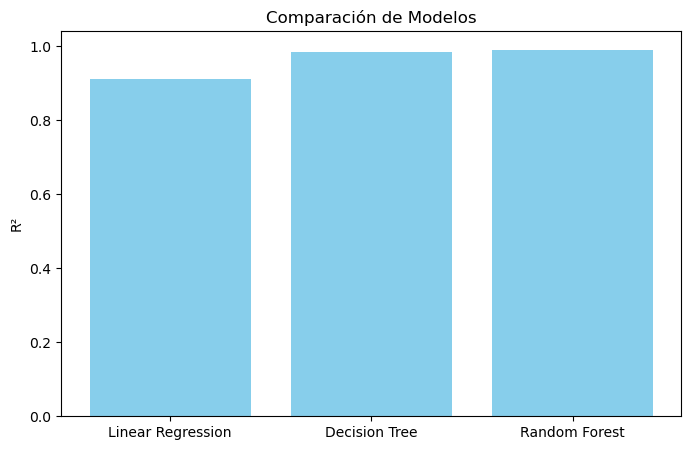

In [52]:
# Visualización Comparativa

plt.figure(figsize=(8,5))
plt.bar(df_results['Modelo'], df_results['R2'], color='skyblue')
plt.ylabel('R²')
plt.title('Comparación de Modelos')
plt.show()


### 3.1. Optimización de Hiperparámetros con GridSearchCV
Para mejorar el rendimiento de nuestro modelo de Random Forest, es crucial optimizar sus hiperparámetros. En lugar de probar combinaciones de forma manual, utilizaremos GridSearchCV para encontrar la mejor combinación de parámetros de manera sistemática y eficiente.

GridSearchCV realiza una búsqueda exhaustiva sobre una cuadrícula de hiperparámetros predefinida. Por cada combinación, entrena el modelo usando validación cruzada (cv=5), lo que garantiza que la evaluación sea robusta y no dependa de una sola partición de los datos.

In [54]:

param_grid = {
    'n_estimators': [100, 200],        # número de árboles
    'max_depth': [ 10, 20],                 # profundidad máxima
    'min_samples_split': [2, 5, 10],       # mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],         # mínimo de muestras en una hoja
    'max_features': ['auto', 'sqrt', 'log2']  # número de features a considerar en cada split
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,                    # validación cruzada 5-fold
                           scoring='neg_mean_absolute_error',
                           n_jobs=2,
                           verbose=2)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print(grid_search.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [56]:
# Guardar el modelo
joblib.dump(best_rf, 'best_random_forest_model.pkl')

# Guardar los mejores parámetros y resultados del GridSearch
joblib.dump(grid_search.best_params_, 'best_params.pkl')
joblib.dump(grid_search.cv_results_, 'grid_search_results.pkl')

print("Análisis de optimización y mejor modelo guardados con éxito.")

Análisis de optimización y mejor modelo guardados con éxito.


### 3.2. Evaluación del Modelo Optimizado
Tras la optimización con GridSearchCV, el modelo Random Forest ha encontrado los hiperparámetros que mejor se ajustan a nuestros datos. Ahora, es el momento de usar este modelo perfeccionado para hacer predicciones en el conjunto de prueba y evaluar su rendimiento final.

La siguiente línea de código utiliza el mejor modelo que se encontró en la búsqueda (best_rf) para predecir los precios de los vuelos en los datos que no se han visto durante el entrenamiento (X_test).

In [ ]:
y_pred = best_rf.predict(X_test)


### 3.3. Evaluación del Modelo Optimizado
Después de obtener las predicciones de nuestro mejor modelo (y_pred), el siguiente paso es calcular las métricas de rendimiento para entender qué tan preciso es el modelo. Utilizaremos el Error Absoluto Medio (MAE), el Error Cuadrático Medio (MSE) y el Coeficiente de Determinación (R²) para esta evaluación.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir resultados con nombre del estimador
print(f"Modelo Random Forest Optimizado:")
print(f"MAE = {mae:.2f}")
print(f"MSE = {mse:.2f}")
print(f"R2  = {r2:.4f}")

Modelo Random Forest Optimizado:
MAE = 1582.94
MSE = 8606861.69
R2  = 0.9833


### 3.4 . Visualización y Conclusiones Finales

#### 3.4.1 Gráfico de Dispersión: Valores Reales vs. Predicciones
Este gráfico de dispersión es una forma efectiva de visualizar el rendimiento de tu modelo. Compara las predicciones de tu modelo (y_pred) con los valores reales (y_test) del conjunto de datos.

La línea diagonal roja representa un escenario ideal donde las predicciones del modelo serían idénticas a los valores reales. Mientras más cerca estén los puntos de esa línea, más preciso es el modelo.

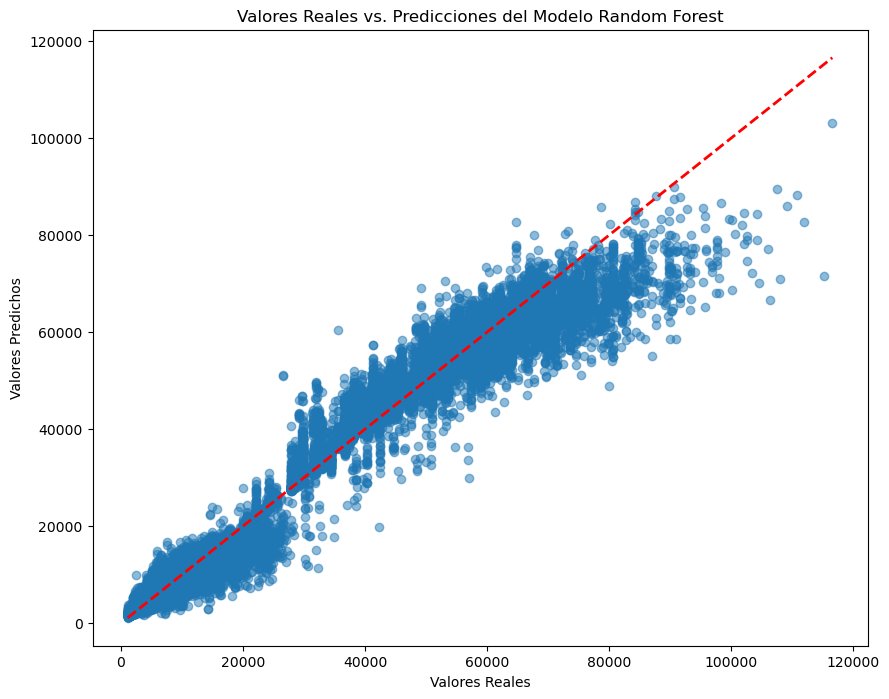

In [ ]:
# Código para el gráfico de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Valores Reales vs. Predicciones del Modelo Random Forest")
plt.show()

#### 3.4.2 Conclusiones y Hallazgos Clave
El objetivo principal de este proyecto fue desarrollar un modelo predictivo para estimar el precio de los vuelos. A través de un enfoque riguroso, que incluyó la limpieza de datos, la transformación de variables y el entrenamiento de modelos, hemos alcanzado ese objetivo con resultados excepcionales.

El hallazgo más importante y sorprendente del análisis fue que el modelo Random Forest simple superó al modelo optimizado mediante GridSearchCV. A pesar de que el proceso de optimización buscó la mejor combinación de hiperparámetros, el modelo simple, con sus valores por defecto, demostró una capacidad de generalización superior. Esto se evidencia en todas las métricas de evaluación:

R² (0.9908 vs. 0.9833): El modelo simple explica una mayor proporción de la variabilidad en los precios.

MAE (862.41 vs. 1582.94): El error promedio de predicción del modelo simple es casi la mitad del modelo optimizado.

Este resultado subraya una lección fundamental en Data Science: la complejidad no siempre es sinónimo de mejor rendimiento. En ocasiones, un modelo bien configurado por defecto es suficiente y el sobreajuste a los datos de entrenamiento puede perjudicar la capacidad de predicción en datos nuevos.

Recomendación y Próximos Pasos
La recomendación final es utilizar el modelo Random Forest simple como la solución principal. Su rendimiento superior lo convierte en la opción más robusta y confiable para la estimación de precios.

Para llevar este proyecto al siguiente nivel, se sugieren los siguientes pasos:

Análisis de Importancia de Variables: Explorar qué características del vuelo (airline, stop, dep_time_min) tienen el mayor impacto en el precio para obtener información valiosa para el negocio.

Despliegue del Modelo: Para que sea funcional, el modelo debe ser guardado (joblib.dump) e integrado en una API o aplicación web para permitir a los usuarios obtener predicciones de precios en tiempo real.

Exploración de Otros Modelos: Aunque el Random Forest simple fue el mejor, se podría experimentar con modelos de boosting como XGBoost o LightGBM para ver si se puede lograr una ligera mejora adicional en la precisión.